In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
# print hostname, working directory, and user
print(os.uname())
print(os.getcwd())
print(os.getlogin())

posix.uname_result(sysname='Linux', nodename='vmrosendahl', release='6.1.0-21-amd64', version='#1 SMP PREEMPT_DYNAMIC Debian 6.1.90-1 (2024-05-03)', machine='x86_64')
/home/rosendahl/remote_interpreter/dataset/jupyter
rosendahl


In [3]:
dir = '/home/rosendahl/remote_interpreter/dataset/jupyter/data/sequences_export_benign_filetypes_more/'

In [4]:
event_types = {}
user_types = {}
fo_types = {}
path_types = {}
net_addr_types = {}
net_port_types = {}

In [36]:
malformed_lines = 0

# for file in dir
for file in os.listdir(dir):
    # open file
    with open(dir + file, 'r') as f:
        for line in f:
            if line.count(',') == 13:
                event, user, fo1_type, fo2_type, path1, path2, net1_localaddr, net1_localport, net1_remoteaddr, net1_remoteport, net2_localaddr, net2_localport, net2_remoteaddr, net2_remoteport = line.split(',')
            else:
                malformed_lines += 1
                continue
            
            event_types[event] = event_types.get(event, 0) + 1
            user_types[user] = user_types.get(user, 0) + 1
            fo_types[fo1_type] = fo_types.get(fo1_type, 0) + 1
            fo_types[fo2_type] = fo_types.get(fo2_type, 0) + 1
            path_types[path1] = path_types.get(path1, 0) + 1
            path_types[path2] = path_types.get(path2, 0) + 1
            net_addr_types[net1_localaddr] = net_addr_types.get(net1_localaddr, 0) + 1
            net_addr_types[net1_remoteaddr] = net_addr_types.get(net1_remoteaddr, 0) + 1
            net_addr_types[net2_localaddr] = net_addr_types.get(net2_localaddr, 0) + 1
            net_addr_types[net2_remoteaddr] = net_addr_types.get(net2_remoteaddr, 0) + 1
            net_port_types[net1_localport] = net_port_types.get(net1_localport, 0) + 1
            net_port_types[net1_remoteport] = net_port_types.get(net1_remoteport, 0) + 1
            net_port_types[net2_localport] = net_port_types.get(net2_localport, 0) + 1
            net_port_types[net2_remoteport] = net_port_types.get(net2_remoteport, 0) + 1

print(f'{malformed_lines=}')    

malformed_lines=583


In [6]:
print(f'{len(event_types)=}')
print(f'{len(user_types)=}')
print(f'{len(fo_types)=}')
print(f'{len(path_types)=}')
print(f'{len(net_addr_types)=}')
print(f'{len(net_port_types)=}')

len(event_types)=29
len(user_types)=17
len(fo_types)=7
len(path_types)=242704
len(net_addr_types)=547
len(net_port_types)=15623


In [7]:
# find only absolute paths in path_types
abs_path_types = {}
for path in path_types:
    if path.startswith('/'):
        abs_path_types[path] = path_types[path]

print(f'{len(abs_path_types)=}')
print(f'abs path percentage: {len(abs_path_types) / len(path_types) * 100:.2f}%')

len(abs_path_types)=239868
abs path percentage: 98.83%


In [8]:
top_directories = {}
for path in abs_path_types:
    top_dir = path.split('/')[1]
    top_directories[top_dir] = top_directories.get(top_dir, 0) + 1
    
print(f'{len(top_directories)=}')

len(top_directories)=21


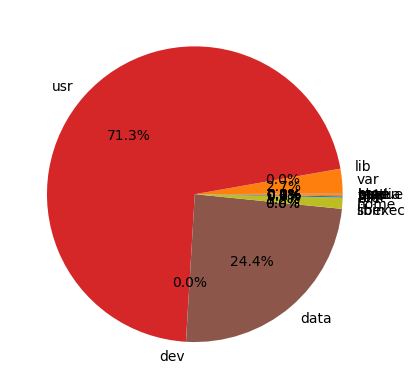

In [9]:
# pie plot top directories
fig, ax = plt.subplots()
ax.pie(top_directories.values(), labels=top_directories.keys(), autopct='%1.1f%%')
plt.show()

In [29]:
# top lvl 2 directories
lvl2_directories = {}
for path in abs_path_types:
    path = path.strip('\n')
    if (len(path.split('/')) <= 3):
        continue
    lvl2_dir = path.split('/')[2]

    lvl2_directories[lvl2_dir] = lvl2_directories.get(lvl2_dir, 0) + 1
    
print(f'{len(lvl2_directories)=}')

len(lvl2_directories)=97


In [30]:
print(lvl2_directories)

{'run': 41, 'lib': 97, 'share': 1133, 'local': 67034, 'darpa': 6, 'home': 3042, 'bin': 50, 'db': 61, 'user': 712, 'pam.d': 6, 'pts': 7, 'mail': 3409, 'spool': 2580, 'libexec': 78, 'defaults': 4, 'at': 7, 'george': 603, 'msgs': 2, 'frank': 652, 'periodic': 51, 'backups': 14, 'cache': 162, 'bob': 482, 'empty': 2, 'sbin': 13, 'ssl': 3, 'ssh': 9, 'gss': 2, 'security': 5, 'log': 48, 'autofs': 1, 'bluetooth': 1, 'cron.d': 1, 'deploy-keys': 1, 'geom': 1, 'resolvconf': 1, '.ICE-unix': 1, '.X11-unix': 1, '.XIM-unix': 1, '.font-unix': 1, 'hsperfdata_darpa': 1, 'hsperfdata_root': 1, 'hsperfdata_ta3': 1, 'screens': 4, 'tmux-1003': 1, 'vUGefai': 1, 'include': 365, 'lib32': 5, 'libdata': 7, 'obj': 7277, 'ports': 78366, 'games': 5, 'heimdal': 1, 'preserve': 2, 'private': 3, 'rwho': 2, 'tmp': 26, 'unbound': 3, 'yp': 1, '.snap': 1, 'error': 1, 'sav': 1, 'ufs': 23780, 'update': 34641, 'newsyslog.conf.d': 8, 'henry': 171, 'casper': 2, 'charles': 219, 'admin': 29, 'pkg': 3, 'dtb': 1, 'firmware': 1, 'kerne

In [31]:
# get all file endings
file_endings = {}
is_dir_count = 0
for path in abs_path_types:
    file_ending = path.split('.')[-1]
    if file_ending in [ '..', '.', '']:
        is_dir_count += 1
        file_ending = 'dir'
    if file_ending == path:
        file_ending = 'no_extension'
    if file_ending == '':
        file_ending = 'no_extension'
    file_endings[file_ending] = file_endings.get(file_ending, 0) + 1

print(f'{len(file_endings)=}')
print(f'{is_dir_count=}')

len(file_endings)=14231
is_dir_count=88091


In [32]:
# print top 25 file endings and their percentage of total
sorted_file_endings = sorted(file_endings.items(), key=lambda x: x[1], reverse=True)
for i in range(25):
    print(f'{sorted_file_endings[i][0]}: {sorted_file_endings[i][1]} ({sorted_file_endings[i][1] / sum(file_endings.values()) * 100:.2f}%)')


dir: 88350 (36.83%)
no_extension: 59151 (24.66%)
hpp: 6834 (2.85%)
ta1-cadets: 5516 (2.30%)
gz: 4921 (2.05%)
ri: 4419 (1.84%)
pyc: 3754 (1.57%)
html: 3493 (1.46%)
py: 3361 (1.40%)
h: 3036 (1.27%)
png: 2404 (1.00%)
pyo: 2307 (0.96%)
UTF-8: 2208 (0.92%)
mo: 1279 (0.53%)
ISO8859-1: 1176 (0.49%)
ISO8859-15: 1036 (0.43%)
elc: 910 (0.38%)
rb: 826 (0.34%)
tmp: 599 (0.25%)
pm: 577 (0.24%)
cmake: 576 (0.24%)
svg: 549 (0.23%)
so: 448 (0.19%)
gif: 442 (0.18%)
xml: 424 (0.18%)


In [33]:
# get all privileged ports
priv_ports = set()
for port in net_port_types:
    port = port.strip('\n')
    if not port.isdigit():
        continue
    if 0 <= int(port) < 1024:
        priv_ports.add(int(port))
        
priv_ports = sorted(list(priv_ports))

print(f'{len(priv_ports)=}')
print(priv_ports)

len(priv_ports)=8
[1, 22, 25, 53, 67, 80, 143, 512]


1: TCP Port Service Multiplexer  
22: ssh  
25: smtp  
53: dns  
67: bootps  
80: http  
143: imap  
512: remote process execution  

In [34]:
# get percentage of privileged ports
priv_port_count = 0
for port in net_port_types:
    port = port.strip('\n')
    if not port.isdigit():
        continue
    if 0 <= int(port) < 1024:
        priv_port_count += net_port_types[port]

print(f'{priv_port_count=}')
print(f'priv port percentage: {priv_port_count / sum(net_port_types.values()) * 100:.2f}%')

priv_port_count=335895
priv port percentage: 0.47%


In [35]:
# check if there are any lines where both net1 and net2 are present
both_net_count = 0

for file in os.listdir(dir):
    with open(dir + file, 'r') as f:
        for line in f:
            if line.count(',') == 13:
                event, user, fo1_type, fo2_type, path1, path2, net1_localaddr, net1_localport, net1_remoteaddr, net1_remoteport, net2_localaddr, net2_localport, net2_remoteaddr, net2_remoteport = line.split(',')
            else:
                continue
            
            if net1_localaddr != 'None' and net2_localaddr != 'None':
                both_net_count += 1

print(f'{both_net_count=}')

both_net_count=7309


PATHS


In [1]:
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import os

# setup connection
conn = psycopg2.connect(
    host='localhost',
    database='cadets_e3',
    user='rosendahl',
)
conn.set_session(readonly=True)
# get cursor
cur = conn.cursor()
cur2 = conn.cursor()

In [5]:
# get all paths, extract most used files and most used directories

directory_counts = {}
file_counts = {}

query = '''
select e.predicateobjectpath_string, e.predicateobject2path_string
from event e;
'''

cur.execute(query)

for row in cur:
    path1, path2 = row
    
    for path in path1, path2:
        if path is None:
            continue
        # discard relative paths
        if not path.startswith('/'):
            continue
        if os.path.isdir(path):
            directory_counts[path] = directory_counts.get(path, 0) + 1
        else:
            # extract directory
            file_counts[path] = file_counts.get(path, 0) + 1
            path = os.path.dirname(path)
            directory_counts[path] = directory_counts.get(path, 0) + 1

print(f'{len(directory_counts)=}')
print(f'{len(file_counts)=}')

len(directory_counts)=102950
len(file_counts)=318381


In [22]:
# get top 25 directories
sorted_directories = sorted(directory_counts.items(), key=lambda x: x[1], reverse=True)
print(sum(directory_counts.values()))
print('top directories:')
partial_sum = 0
for i in range(25):
    print(f'{sorted_directories[i][0]}: {sorted_directories[i][1]}')
    partial_sum += sorted_directories[i][1]
print(f'share of first: {partial_sum / sum(directory_counts.values()) * 100:.2f}%')



16487842
top directories:
/dev: 6518016
/etc: 4107069
/var/run: 637533
/lib: 562369
/var/mail: 345507
/libexec: 210990
/usr/share/zoneinfo: 207847
/usr/local/lib: 153755
/usr/local/bin: 134227
/var/log: 121315
/usr/lib: 119359
/home/bob: 104520
/usr/local/etc/postfix: 98865
/bin: 98256
/home/user/mail: 71963
/usr/share/misc: 71097
/etc/defaults: 68195
/usr/bin: 65941
/home/frank: 57087
/usr/local/libexec/git-core: 51934
/usr/local/x86_64-portbld-freebsd12.0/lib/ldscripts: 50343
/home/darpa: 46531
/usr/home/darpa: 46478
/usr/local/libexec/postfix: 45952
/home/george: 44189
share of first: 85.15%


In [15]:
# get top 25 files
sorted_files = sorted(file_counts.items(), key=lambda x: x[1], reverse=True)
print('top files:')
for i in range(25):
    print(f'{sorted_files[i][0]}: {sorted_files[i][1]}')

top files:
/dev/kmem: 4169304
/dev/random: 1613965
/etc/pwd.db: 1475878
/etc/spwd.db: 635034
/var/run/ld-elf.so.hints: 631639
/etc/services: 630918
/etc/libmap.conf: 420705
/dev/tty: 412366
/etc/hosts: 376730
/libexec/ld-elf.so.1: 210952
/dev/hpet0: 210910
/lib/libc.so.7: 209597
/etc/login.conf: 164924
/etc/nsswitch.conf: 163564
/etc/group: 114629
/usr/share/zoneinfo/posixrules: 103924
/usr/share/zoneinfo/UTC: 103915
/var/log/maillog: 97740
/home/bob/Sent: 94974
/var/mail/bob: 85275
/usr/local/etc/postfix/main.cf: 80065
/etc/resolv.conf: 74304
/usr/share/misc/termcap.db: 71083
/var/mail/frank: 67857
/home/user/mail/sent-mail: 67695


In [29]:
for i in range(100):
    if sorted_files[i][0].count(',') > 0:
        assert False
    print(f'{sorted_files[i][0]}')

/dev/kmem
/dev/random
/etc/pwd.db
/etc/spwd.db
/var/run/ld-elf.so.hints
/etc/services
/etc/libmap.conf
/dev/tty
/etc/hosts
/libexec/ld-elf.so.1
/dev/hpet0
/lib/libc.so.7
/etc/login.conf
/etc/nsswitch.conf
/etc/group
/usr/share/zoneinfo/posixrules
/usr/share/zoneinfo/UTC
/var/log/maillog
/home/bob/Sent
/var/mail/bob
/usr/local/etc/postfix/main.cf
/etc/resolv.conf
/usr/share/misc/termcap.db
/var/mail/frank
/home/user/mail/sent-mail
/lib/libelf.so.2
/lib/libkvm.so.7
/bin/sleep
/etc/defaults/rc.conf
/dev/null
/home/darpa/.lsof_ta1-cadets
/lib/libutil.so.9
/var/mail/user
/dev/urandom
/lib/libxo.so.0
/usr/lib/libmemstat.so.3
/usr/bin/vmstat
/data/gather_stats_uma.txt
/lib/libdevstat.so.7
/usr/local/libexec/postfix/dynamicmaps.cf
/usr/local/libexec/postfix/dynamicmaps.cf.d/pcre.cf
/var/mail/george
/usr/local/etc/c-client.cf
/etc/pam.d/other
/lib/libm.so.5
/home/frank/Archives
/lib/libncursesw.so.8
/usr/local/etc/postfix/virtual.db
/home/george/Sent
/var/mail/charles
/etc/aliases.db
/usr/local